<a href="https://colab.research.google.com/github/bhavyakalra/Deep-learning/blob/master/CNN_Malaria_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Applying CNN on malaria dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip install -q keras

In [4]:
import keras

In [5]:
from __future__ import absolute_import, division, print_function
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
print(os.listdir("/content/drive/My Drive/Colab/cell_images"))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['Train', 'Test']


In [6]:
infected = os.listdir('/content/drive/My Drive/Colab/cell_images/Train/Parasite') 
uninfected = os.listdir('/content/drive/My Drive/Colab/cell_images/Train/Uninfected')

In [7]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("/content/drive/My Drive/Colab/cell_images/Train/Parasite/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("/content/drive/My Drive/Colab/cell_images/Train/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

In [8]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [9]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (1468, 50, 50, 3) | labels : (1468,)


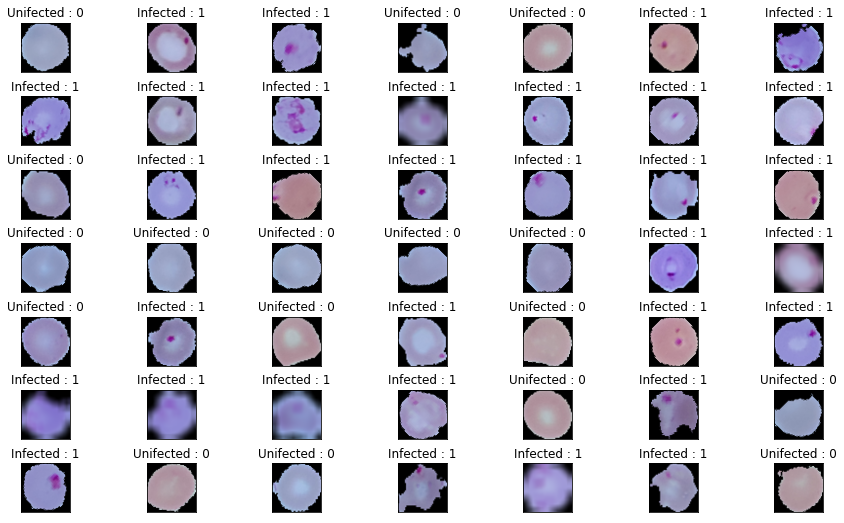

In [10]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

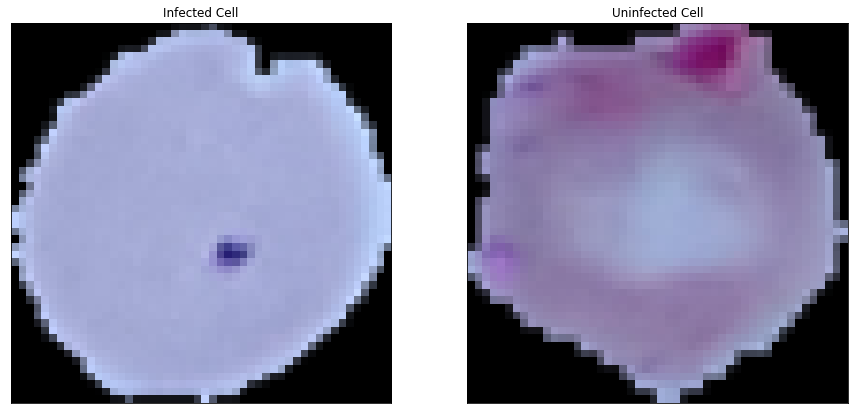

In [11]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[200])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [12]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [13]:
cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

In [14]:
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

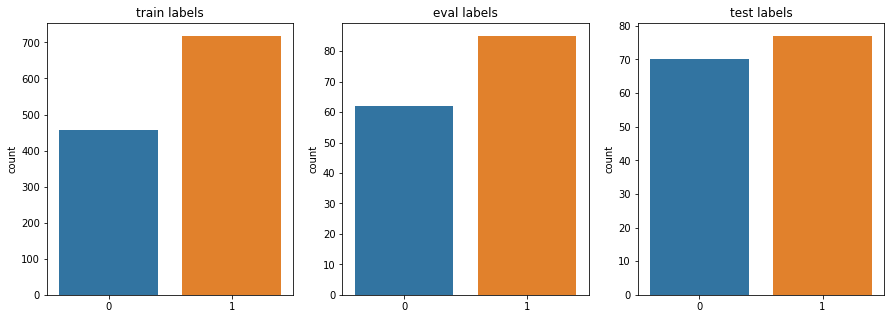

In [15]:
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_y , eval_y , test_y] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [16]:
print('train data shape {} ,eval data shape {} , test data shape {}'.format(train_x.shape,
                                                                           eval_x.shape ,
                                                                           test_x.shape))

train data shape (1174, 50, 50, 3) ,eval data shape (147, 50, 50, 3) , test data shape (147, 50, 50, 3)


In [43]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab/cell_images/Train'
valid_path = '/content/drive/My Drive/Colab/cell_images/Test'

In [44]:

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [45]:
for layer in mobilnet.layers:
    layer.trainable = False

In [46]:
from glob import glob
folders = glob('/content/drive/My Drive/Colab/cell_images/Train/*')

In [47]:
folders

['/content/drive/My Drive/Colab/cell_images/Train/Uninfected',
 '/content/drive/My Drive/Colab/cell_images/Train/Parasite']

In [48]:

x = Flatten()(mobilnet.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [49]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [50]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [52]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab/cell_images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [53]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab/cell_images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [54]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
13/13 [==============================] - 49s 4s/step - loss: 1.7170 - accuracy: 0.5361 - val_loss: 0.9190 - val_accuracy: 0.6791
Epoch 2/10
13/13 [==============================] - 7s 513ms/step - loss: 0.8985 - accuracy: 0.5601 - val_loss: 0.9200 - val_accuracy: 0.5299
Epoch 3/10
13/13 [==============================] - 7s 513ms/step - loss: 0.4486 - accuracy: 0.8005 - val_loss: 0.4952 - val_accuracy: 0.7388
Epoch 4/10
13/13 [==============================] - 7s 516ms/step - loss: 0.4222 - accuracy: 0.7981 - val_loss: 0.5353 - val_accuracy: 0.7239
Epoch 5/10
13/13 [==============================] - 7s 520ms/step - loss: 0.3953 - accuracy: 0.8245 - val_loss: 0.5146 - val_accuracy: 0.7388
Epoch 6/10
13/13 [==============================] - 7s 521ms/step - loss: 0.2750 - accuracy: 0.8918 - val_loss: 0.4232 - val_accuracy: 0.7612
Epoch 7/10
13/13 [==============================] - 7s 515ms/step - loss: 0.2707 - accuracy: 0.9038 - val_loss: 0.3800 - val_accuracy: 0.7836
Epoch 8/

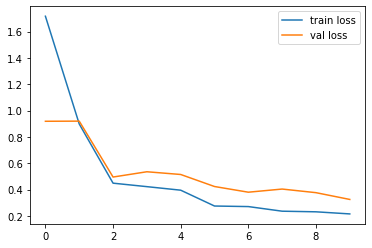

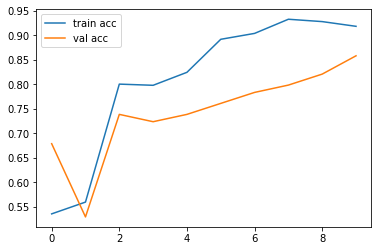

<Figure size 432x288 with 0 Axes>

In [55]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')